IMPORTING  LIBRARIES

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load The Data

Exploratory Data Analysis


In [2]:
housing = pd.read_csv(r'\Users\User\Documents\housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Selecting the specified features enumerated

In [4]:
use_columns =housing[['longitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]



In [5]:
use_columns.head()

,longitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [6]:
use_columns.shape

(20640, 9)

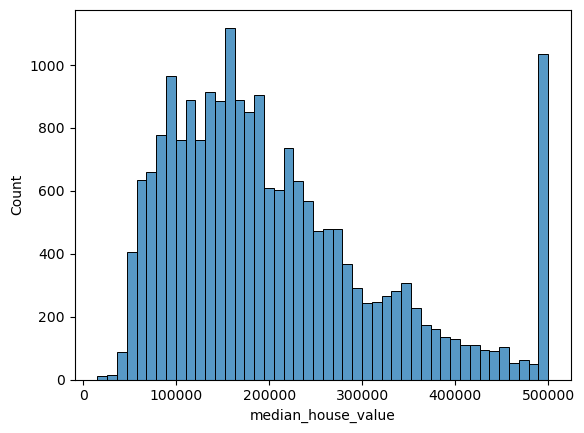

In [7]:
sns.histplot(use_columns.median_house_value);

QUESTION 1

Find a feature with missing values. How many missing values does it have?

In [8]:
use_columns.isnull().sum()

longitude               0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2

What's the median (50% percentile) for variable 'population'?

In [9]:
use_columns.describe()

,longitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
np.median(use_columns['population'])

1166.0

In [11]:
n =len(use_columns)

In [12]:
n

20640

Splitting  the data and using random seed 42

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [13]:
# 60 , 20, 20 spread
n = len(use_columns)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(42)

np.random.shuffle(idx)

In [16]:
use_columns_train = use_columns.iloc[idx[:n_train]]
use_columns_val = use_columns.iloc[idx[n_train:n_train+n_val]]
use_columns_test = use_columns.iloc[idx[n_train+n_val:]]

In [17]:
use_columns_train 

,longitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,-117.81,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,-120.68,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,-120.91,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,-117.72,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [18]:
len(use_columns_train),len(use_columns_val),len(use_columns_test)

(12384, 4128, 4128)

In [19]:
y_train = np.log1p(use_columns_train.median_house_value)
y_val = np.log1p(use_columns_val.median_house_value)
y_test = np.log1p(use_columns_test.median_house_value)

In [20]:
del use_columns_train["median_house_value"]
del use_columns_val["median_house_value"]
del use_columns_test["median_house_value"]

In [21]:
use_columns_train.head()

,longitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,-119.46,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,-122.44,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,-118.72,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,-121.93,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [22]:
use_columns_train = use_columns_train.reset_index(drop = True)
use_columns_val = use_columns_val.reset_index(drop = True)
use_columns_test= use_columns_test.reset_index(drop = True)

In [23]:
len(y_train)

12384

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

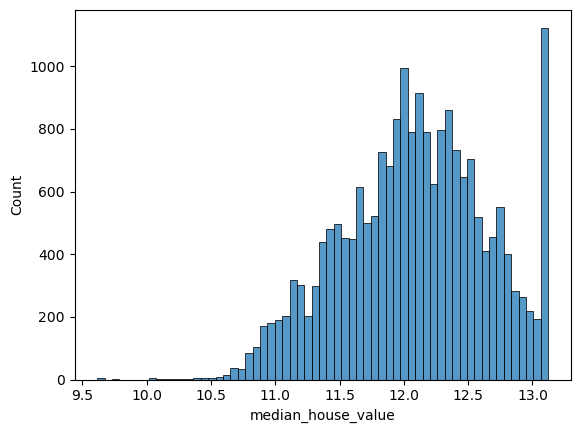

In [24]:
sns.histplot(np.log1p(use_columns.median_house_value))

filling na with zero

In [25]:
def prepare_X(use_columns, fillna_value):
    use_columns_num = use_columns.copy()
    use_columns_num = use_columns_num.fillna(fillna_value)
    X = use_columns_num.values
    return X

In [26]:
def train_linear_regression(X,y):
    
    ##adding a first column of ones
    ## This is trying to replicate w0*x0 where x0 is 1
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [27]:
X_train_zero = prepare_X(use_columns_train,0)
w0,w = train_linear_regression(X_train_zero, y_train)

w0, w

(12.487717652164442,
 array([ 1.15606125e-02,  0.00000000e+00,  7.68292092e-03, -8.80993182e-05,
         1.47214150e-04, -1.78072814e-04,  9.85716653e-04,  2.21353615e-01]))

In [28]:
y_pred = w0 + X_train_zero.dot(w)
y_pred

array([11.64950733, 11.9351852 , 12.62063023, ..., 12.12897798,
       12.19770575, 12.5396816 ])

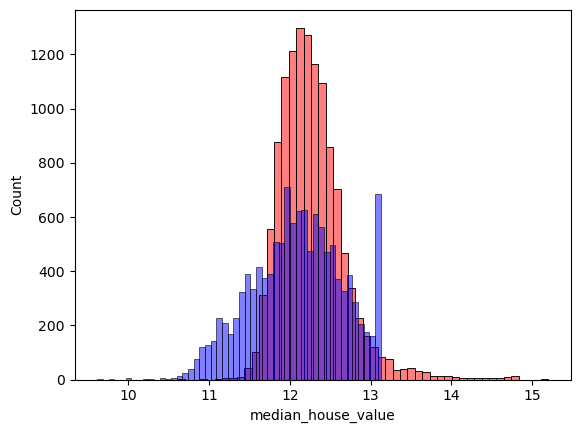

In [29]:
sns.histplot(y_pred, color="red", alpha = 0.5, bins=50)
sns.histplot(y_train, color="blue", alpha = 0.5, bins=50);

In [30]:
def rmse(y,y_pred):
    error = (y-y_pred)**2
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
rmse(y_train, y_pred)

0.37535616478605893

In [32]:
X_train_zero = prepare_X(use_columns_train,0)
w0,w = train_linear_regression(X_train_zero, y_train)

X_val = prepare_X(use_columns_val,0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.37

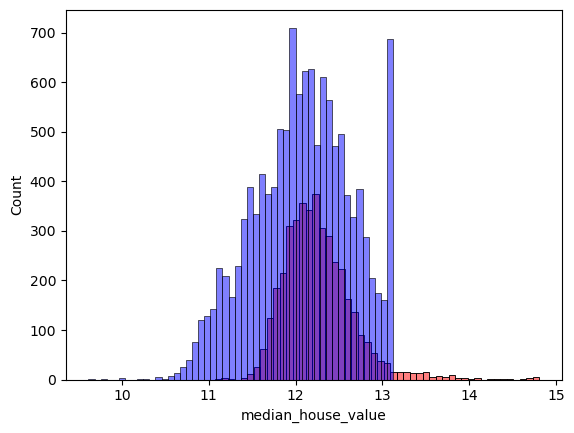

In [33]:
sns.histplot(y_pred, color="red", alpha = 0.5, bins=50)
sns.histplot(y_train, color="blue", alpha = 0.5, bins=50);

Filling with mean

In [34]:
mean_value =use_columns['total_bedrooms'].mean()

In [35]:
mean_value

537.8705525375618

In [36]:
X_train_mean = prepare_X(use_columns_train, mean_value)
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X(use_columns_val, mean_value)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score = round(score, 2)
score

6.66

In [37]:
np.allclose(X_train_zero, X_train_mean)

False

In [38]:
X_train_mean

array([[-1.1901e+02, -1.1901e+02,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02, -1.1946e+02,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02, -1.2244e+02,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02, -1.2091e+02,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02, -1.1772e+02,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02, -1.2247e+02,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [39]:
use_columns_val.isna().sum()


longitude             0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Question 4

let's train a regularized linear regression.

In [40]:
def prepare_X(use_columns):
    use_columns = use_columns.copy()
    use_columns_num = use_columns.fillna(0)
    X = use_columns_num.values
    return X

In [41]:
def train_linear_regression_reg(X,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [42]:
def rmse(y,y_pred):
    error = (y-y_pred)**2
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [43]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(use_columns_train)
    w0,w = train_linear_regression_reg(X_train, y_train,r=r)

    X_val = prepare_X(use_columns_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r,w0,score)

0 12.487717652164442 0.36528279992272705
1e-06 11.508724381520723 0.3033862257469427
0.0001 11.433141658308255 0.30167899246319624
0.001 11.431048909306249 0.3018174196139196
0.01 11.400314832458887 0.301825800895026
0.1 11.101523794640089 0.30182195806288564
1 8.796117151292137 0.30431330441252025
5 4.574408376197986 0.32007166110655183
10 2.85924694476164 0.33041574636039117


Question 5 
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    

In [44]:
def prepare_X(use_columns):
    use_columns = use_columns.copy()
    use_columns_num = use_columns.fillna(0)
    X = use_columns_num.values
    return X

def train_linear_regression(X,y):
    
    ##adding a first column of ones
    ## This is trying to replicate w0*x0 where x0 is 1
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y,y_pred):
    error = y-y_pred
    se = error **2
    mse = se.mean()
    return round(np.sqrt(mse),2)


In [45]:
n_val= int(n*0.2)
n_test= int(n*0.2)
n_train = n-n_val-n_test

all_scores = []
idx = np.arange(n)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    use_columns_train = use_columns.iloc[idx[:n_train]]
    use_columns_val = use_columns.iloc[idx[n_train:n_train+n_val]]
    use_columns_test = use_columns.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(use_columns_train.median_house_value)
    y_val = np.log1p(use_columns_val.median_house_value)
    y_test = np.log1p(use_columns_test.median_house_value)

    del use_columns_train["median_house_value"]
    del use_columns_val["median_house_value"]
    del use_columns_test["median_house_value"]
     
    
    X_train = prepare_X(use_columns_train)
    w0,w = train_linear_regression_reg(X_train, y_train)

    X_val = prepare_X(use_columns_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    all_scores.append(score)

    print(seed,w0,score)

0 11.308340668617925 0.39
1 11.128815288729708 0.39
2 11.344650707915193 0.39
3 11.200812055093774 0.4
4 11.413684708395827 0.39
5 11.100800863458298 0.4
6 11.36712996088991 0.4
7 11.32532783234294 0.4
8 11.268542914628581 0.4
9 11.238094143820085 0.39


In [46]:
all_scores

[0.39, 0.39, 0.39, 0.4, 0.39, 0.4, 0.4, 0.4, 0.4, 0.39]

In [47]:
std = np.std(all_scores)
round(std, 3)

0.005

Question 6

In [48]:
def train_linear_regression_reg(X,y, r=0.001):
    
    ##adding a first column of ones
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    ### The below syntax (X.T)  means Transpose(X) * X
    ### Also known as the gram matrix
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    ##inverse of matrix
    XTX_inv = np.linalg.inv(XTX)
    
    # (XTX)^-1 * Transpose(X) * y
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [49]:
## Doing a full train using both traing and valididation dataset
use_columns_full_train = pd.concat([use_columns_train, use_columns_val])
use_columns_full_train = use_columns_full_train.reset_index(drop=True)
X_full_train = prepare_X(use_columns_full_train)
X_full_train

array([[-1.2225e+02, -1.2225e+02,  1.6000e+01, ...,  9.4600e+02,
         2.6600e+02,  5.7001e+00],
       [-1.1736e+02, -1.1736e+02,  3.0000e+00, ...,  7.5880e+03,
         2.2850e+03,  3.9792e+00],
       [-1.1763e+02, -1.1763e+02,  4.0000e+00, ...,  8.0500e+02,
         2.7100e+02,  7.6012e+00],
       ...,
       [-1.1935e+02, -1.1935e+02,  1.4000e+01, ...,  5.6800e+02,
         2.2900e+02,  3.1486e+00],
       [-1.2123e+02, -1.2123e+02,  4.9000e+01, ...,  5.9000e+01,
         2.6000e+01,  3.6500e+00],
       [-1.2060e+02, -1.2060e+02,  1.0000e+01, ...,  1.3680e+03,
         4.8700e+02,  4.6667e+00]])

In [50]:
y_full_train = np.concatenate([y_train, y_val])
w0,w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0

11.25731950956724

In [51]:
X_test = prepare_X(use_columns_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.39